In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from imports import *
# from process_data import *
from train import initialize_model
from datasets import *
import matplotlib.pyplot as plt
import time

In [3]:
# tiling_data = DNASeqGraph("/Users/Brody1/Documents/Northwestern/DNA_Cyclizability/benchmarks/gnns", 
#                           raw_graph_name="cycle5", processed_graph_name="cycle5_1_to_49_edge_together", 
#                           edge_distances=list(range(1,50)))
# random_data = DNASeqGraph("/Users/Brody1/Documents/Northwestern/DNA_Cyclizability/benchmarks/gnns", 
#                           raw_graph_name="cycle3", processed_graph_name="cycle3_1_to_49_edge_together", 
#                           edge_distances=list(range(1,50)))

In [4]:
# tiling_data = DNASeqGraphSeparateEdges("/Users/Brody1/Documents/Northwestern/DNA_Cyclizability/benchmarks/gnns", 
#                                        raw_graph_name="cycle5", 
#                                        processed_graph_name="cycle5_1_5_10_15_edge_separate_include_indices", 
#                                        edge_distances=[1,5,10,15],
#                                        include_indices=True)
# random_data = DNASeqGraphSeparateEdges("/Users/Brody1/Documents/Northwestern/DNA_Cyclizability/benchmarks/gnns", 
#                                        raw_graph_name="cycle3", 
#                                        processed_graph_name="cycle3_1_5_10_15_edge_separate_include_indices", 
#                                        edge_distances=[1,5,10,15],
#                                        include_indices=True)
# yeast_data = DNASeqGraphSeparateEdges("/Users/Brody1/Documents/Northwestern/DNA_Cyclizability/benchmarks/gnns", 
#                                        raw_graph_name="cycle1", 
#                                        processed_graph_name="cycle1_1_5_10_15_edge_separate_include_indices", 
#                                        edge_distances=[1,5,10,15],
#                                        include_indices=True)
# chrv_data = DNASeqGraphSeparateEdges("/Users/Brody1/Documents/Northwestern/DNA_Cyclizability/benchmarks/gnns", 
#                                        raw_graph_name="cycle6", 
#                                        processed_graph_name="cycle6_1_5_10_15_edge_separate_include_indices", 
#                                        edge_distances=[1,5,10,15],
#                                        include_indices=True)

In [5]:
tiling_data = DNASeqGraphSeparateEdges("/Users/Brody1/Documents/Northwestern/DNA_Cyclizability/benchmarks/gnns", 
                                       raw_graph_name="cycle5", 
                                       processed_graph_name="cycle5_1_2_3_5_10_15_20_25_30_edge_separate_include_indices", 
                                       edge_distances=[1,2,3,5,10,15,20,25,30],
                                       include_indices=True)
random_data = DNASeqGraphSeparateEdges("/Users/Brody1/Documents/Northwestern/DNA_Cyclizability/benchmarks/gnns", 
                                       raw_graph_name="cycle3", 
                                       processed_graph_name="cycle3_1_2_3_5_10_15_20_25_30_edge_separate_include_indices", 
                                       edge_distances=[1,2,3,5,10,15,20,25,30],
                                       include_indices=True)
yeast_data = DNASeqGraphSeparateEdges("/Users/Brody1/Documents/Northwestern/DNA_Cyclizability/benchmarks/gnns", 
                                      raw_graph_name="cycle1", 
                                      processed_graph_name="cycle1_1_2_3_5_10_15_20_25_30_edge_separate_include_indices", 
                                      edge_distances=[1,2,3,5,10,15,20,25,30],
                                      include_indices=True)
chrv_data = DNASeqGraphSeparateEdges("/Users/Brody1/Documents/Northwestern/DNA_Cyclizability/benchmarks/gnns", 
                                     raw_graph_name="cycle6", 
                                     processed_graph_name="cycle6_1_2_3_5_10_15_20_25_30_edge_separate_include_indices", 
                                     edge_distances=[1,2,3,5,10,15,20,25,30],
                                     include_indices=True)

In [6]:
# cluster_list = [
#     torch.Tensor(
#         [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4])
# ]
hyperparameters = {"mp_hidden_channels":48, "mlp_hidden_channels":128, "num_layers":[1], "num_epochs":200, "learning_rate":0.0001, "batch_size":32,
                   "pool_ratios":[], "pool_types":[], "mlp_num_layers":2, "edge_lengths":[[1,2,3],[5,10,15,20,25,30]], 
                   "mp_layer":GCN, "jk":"lstm", "num_nodes":50, "max_time":8*60*60, "final_dropout": 0.2}

In [7]:
logging_info = {"print_every":1, "folder_path":"/Users/Brody1/Documents/Northwestern/DNA_Cyclizability/benchmarks/gnns/",
                "file_name": "edge_separate_1_2_3__5_10_15_20_25_30_with_mlps_2layer_GCN_1layer_48mphc_128mlphc_include_indices_no_final_pooling_02finaldropout_8hr"}

In [8]:
model = initialize_model(model_name="GraphSAGESeparateEdgeLengthsWithMLPsNoFinalPooling", num_node_features=tiling_data.x.shape[1],
                         output_features=tiling_data.y.shape[1], hyperparameters=hyperparameters)
model.load_state_dict(torch.load(logging_info["folder_path"] + "models/" + logging_info["file_name"]))

<All keys matched successfully>

In [9]:
model.eval()
tiling_loader = DataLoader(tiling_data, batch_size=1)
tiling_pred = []
tiling_obs = []

x = [-3.5, 3.5]
y = [-3.5, 3.5]

start_time = time.time()
with torch.no_grad():
    for i, tiling_batch in enumerate(tiling_loader):
        tiling_pred.append(model(tiling_batch).item())
        tiling_obs.append(tiling_batch.y.item())
        # print(f"Sequence number {i} \n \t prediction: {tiling_pred[i].item()} \n \t observed: {tiling_batch.y.item()}")
        if i % 1000 == 999:
            print(f"{i+1} predictions in {time.time() - start_time} seconds:")
            print(f"\t Correlation: {np.corrcoef((tiling_pred, tiling_obs))[0,1]}")
            # plt.xlim(x)
            # plt.ylim(y)
            # plt.xlabel("Predicted")
            # plt.ylabel("Observed")
            # plt.plot(x, y, color="black")
            # plt.scatter(tiling_pred, tiling_obs, marker="o", alpha=0.1)
            # plt.pause(0.00001)

1000 predictions in 10.27406907081604 seconds:
	 Correlation: 0.9604146481862844
2000 predictions in 20.853440046310425 seconds:
	 Correlation: 0.9599789158695717
3000 predictions in 30.62512993812561 seconds:
	 Correlation: 0.9619660216950933
4000 predictions in 40.3533570766449 seconds:
	 Correlation: 0.9612568916882235
5000 predictions in 51.4119873046875 seconds:
	 Correlation: 0.9603383434611515
6000 predictions in 62.71805810928345 seconds:
	 Correlation: 0.95988664919483
7000 predictions in 73.17075395584106 seconds:
	 Correlation: 0.9598953223233552
8000 predictions in 83.23104310035706 seconds:
	 Correlation: 0.9604960454012502
9000 predictions in 94.23339319229126 seconds:
	 Correlation: 0.9614242530388569
10000 predictions in 104.59470319747925 seconds:
	 Correlation: 0.9620478060386143
11000 predictions in 116.57609105110168 seconds:
	 Correlation: 0.9617152255300621
12000 predictions in 126.48088717460632 seconds:
	 Correlation: 0.9622284695095916
13000 predictions in 136.

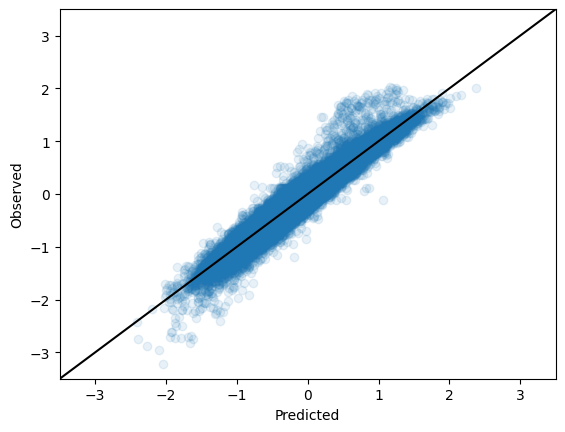

In [10]:
plt.xlim(x)
plt.ylim(y)
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot(x, y, color="black")
plt.scatter(tiling_pred, tiling_obs, marker="o", alpha=0.1)
plt.show()

In [11]:
model.eval()
random_loader = DataLoader(random_data, batch_size=1)
random_pred = []
random_obs = []

x = [-3.5, 3.5]
y = [-3.5, 3.5]

start_time = time.time()
with torch.no_grad():
    for i, random_batch in enumerate(random_loader):
        random_pred.append(model(random_batch).item())
        random_obs.append(random_batch.y.item())
        # print(f"Sequence number {i} \n \t prediction: {tiling_pred[i].item()} \n \t observed: {tiling_batch.y.item()}")
        if i % 1000 == 999:
            print(f"{i+1} predictions in {time.time() - start_time} seconds:")
            print(f"\t Correlation: {np.corrcoef((random_pred, random_obs))[0,1]}")
            # plt.xlim(x)
            # plt.ylim(y)
            # plt.xlabel("Predicted")
            # plt.ylabel("Observed")
            # plt.plot(x, y, color="black")
            # plt.scatter(random_pred, random_obs, marker="o", alpha=0.1)
            # plt.pause(0.00001)

1000 predictions in 11.482502222061157 seconds:
	 Correlation: 0.8312954472419591
2000 predictions in 22.262755155563354 seconds:
	 Correlation: 0.8433056332910648
3000 predictions in 34.42419910430908 seconds:
	 Correlation: 0.8454651246999421
4000 predictions in 46.307844161987305 seconds:
	 Correlation: 0.8488201346156332
5000 predictions in 56.78880310058594 seconds:
	 Correlation: 0.8479758712447458
6000 predictions in 66.97734713554382 seconds:
	 Correlation: 0.8511212575281206
7000 predictions in 77.49040007591248 seconds:
	 Correlation: 0.8530125371938191
8000 predictions in 87.54631114006042 seconds:
	 Correlation: 0.8537439533291802
9000 predictions in 100.14206624031067 seconds:
	 Correlation: 0.8529751741308701
10000 predictions in 110.99494218826294 seconds:
	 Correlation: 0.8512737814003243
11000 predictions in 121.98806285858154 seconds:
	 Correlation: 0.8498281135312333
12000 predictions in 133.52669620513916 seconds:
	 Correlation: 0.847250679408733


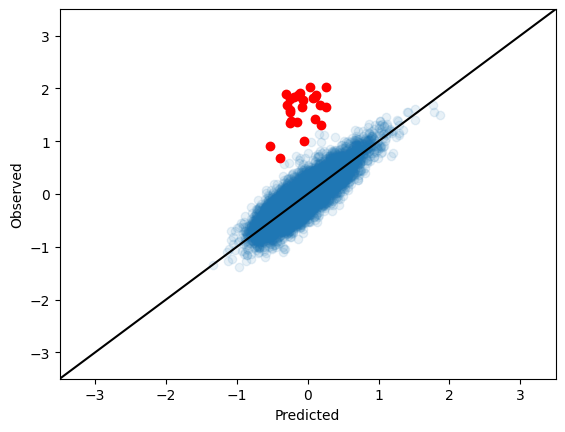

In [ ]:
plt.xlim(x)
plt.ylim(y)
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot(x, y, color="black")
plt.scatter(random_pred, random_obs, marker="o", alpha=0.1)
random_large_resid_idx = np.where(abs(np.array(random_pred) - np.array(random_obs)) > 1)
plt.scatter(np.array(random_pred)[random_large_resid_idx], np.array(random_obs)[random_large_resid_idx], color="red")
plt.show()

In [40]:
random_small_resid_idx = np.where(abs(np.array(random_pred) - np.array(random_obs)) <= 1)
np.corrcoef(np.array(random_pred)[random_small_resid_idx], np.array(random_obs)[random_small_resid_idx])

array([[1.        , 0.86681338],
       [0.86681338, 1.        ]])

In [1]:
np.array(random_obs)[large_resid_idx], np.array(random_pred)[large_resid_idx]

NameError: name 'np' is not defined

In [13]:
model.eval()
yeast_loader = DataLoader(yeast_data, batch_size=1)
yeast_pred = []
yeast_obs = []

x = [-3.5, 3.5]
y = [-3.5, 3.5]

start_time = time.time()
with torch.no_grad():
    for i, yeast_batch in enumerate(yeast_loader):
        yeast_pred.append(model(yeast_batch).item())
        yeast_obs.append(yeast_batch.y.item())
        # print(f"Sequence number {i} \n \t prediction: {tiling_pred[i].item()} \n \t observed: {tiling_batch.y.item()}")
        if i % 1000 == 999:
            print(f"{i+1} predictions in {time.time() - start_time} seconds:")
            print(f"\t Correlation: {np.corrcoef((yeast_pred, yeast_obs))[0,1]}")
            # plt.xlim(x)
            # plt.ylim(y)
            # plt.xlabel("Predicted")
            # plt.ylabel("Observed")
            # plt.plot(x, y, color="black")
            # plt.scatter(yeast_pred, yeast_obs, marker="o", alpha=0.1)
            # plt.pause(0.00001)

1000 predictions in 11.633761644363403 seconds:
	 Correlation: 0.8335521525875358
2000 predictions in 22.785217761993408 seconds:
	 Correlation: 0.838029319650121
3000 predictions in 34.38259768486023 seconds:
	 Correlation: 0.8367767857397018
4000 predictions in 46.926652908325195 seconds:
	 Correlation: 0.8347885912441982
5000 predictions in 58.39171886444092 seconds:
	 Correlation: 0.8351375546003865
6000 predictions in 70.08537578582764 seconds:
	 Correlation: 0.8350960546073467
7000 predictions in 81.58073282241821 seconds:
	 Correlation: 0.8363104795170516
8000 predictions in 94.0159227848053 seconds:
	 Correlation: 0.837105221073942
9000 predictions in 104.47555184364319 seconds:
	 Correlation: 0.8359060886800899
10000 predictions in 115.56893682479858 seconds:
	 Correlation: 0.8367336643859898
11000 predictions in 126.21006989479065 seconds:
	 Correlation: 0.8332834125300498
12000 predictions in 136.74339771270752 seconds:
	 Correlation: 0.8290649205152086
13000 predictions in 

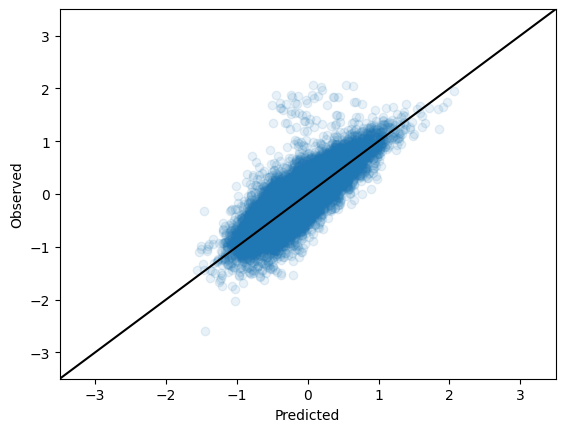

In [14]:
plt.xlim(x)
plt.ylim(y)
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot(x, y, color="black")
plt.scatter(yeast_pred, yeast_obs, marker="o", alpha=0.1)
plt.show()

In [15]:
model.eval()
chrv_loader = DataLoader(chrv_data, batch_size=1)
chrv_pred = []
chrv_obs = []

x = [-3.5, 3.5]
y = [-3.5, 3.5]

start_time = time.time()
with torch.no_grad():
    for i, chrv_batch in enumerate(chrv_loader):
        chrv_pred.append(model(chrv_batch).item())
        chrv_obs.append(chrv_batch.y.item())
        # print(f"Sequence number {i} \n \t prediction: {tiling_pred[i].item()} \n \t observed: {tiling_batch.y.item()}")
        if i % 1000 == 999:
            print(f"{i+1} predictions in {time.time() - start_time} seconds:")
            print(f"\t Correlation: {np.corrcoef((chrv_pred, chrv_obs))[0,1]}")
            # plt.xlim(x)
            # plt.ylim(y)
            # plt.xlabel("Predicted")
            # plt.ylabel("Observed")
            # plt.plot(x, y, color="black")
            # plt.scatter(chrv_pred, chrv_obs, marker="o", alpha=0.1)
            # plt.pause(0.00001)

1000 predictions in 10.464854001998901 seconds:
	 Correlation: 0.7379025142503917
2000 predictions in 21.26082468032837 seconds:
	 Correlation: 0.7742463748790581
3000 predictions in 31.04700803756714 seconds:
	 Correlation: 0.7594657146500351
4000 predictions in 40.74425292015076 seconds:
	 Correlation: 0.7535871230196634
5000 predictions in 50.4372239112854 seconds:
	 Correlation: 0.7638168094760267
6000 predictions in 60.12245297431946 seconds:
	 Correlation: 0.7706474657585579
7000 predictions in 69.8058009147644 seconds:
	 Correlation: 0.7747512734423047
8000 predictions in 79.66310095787048 seconds:
	 Correlation: 0.7819851552363223
9000 predictions in 89.32206177711487 seconds:
	 Correlation: 0.7797573478697286
10000 predictions in 99.02332592010498 seconds:
	 Correlation: 0.7747229361130237
11000 predictions in 108.70859479904175 seconds:
	 Correlation: 0.7743419402226533
12000 predictions in 118.37699580192566 seconds:
	 Correlation: 0.7673012499594921
13000 predictions in 128

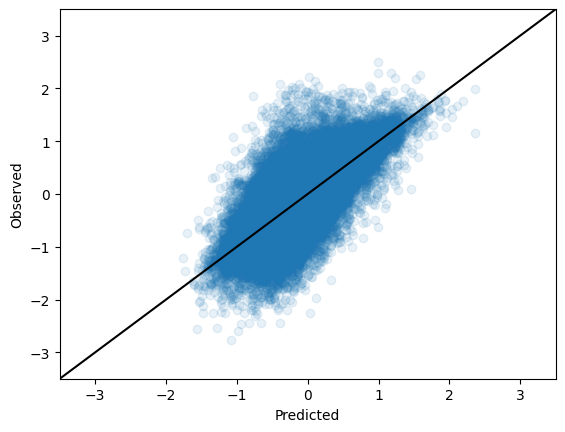

In [16]:
plt.xlim(x)
plt.ylim(y)
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot(x, y, color="black")
plt.scatter(chrv_pred, chrv_obs, marker="o", alpha=0.1)
plt.show()